In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf 

import warnings 
warnings.simplefilter('ignore')
print(f'TensorFlow Version: {tf.__version__}')

TensorFlow Version: 2.8.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [4]:
# data = pd.read_csv('insurance.csv')

In [5]:
data = pd.read_csv('/content/drive/My Drive/Global AI Hub/insurance.csv')

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


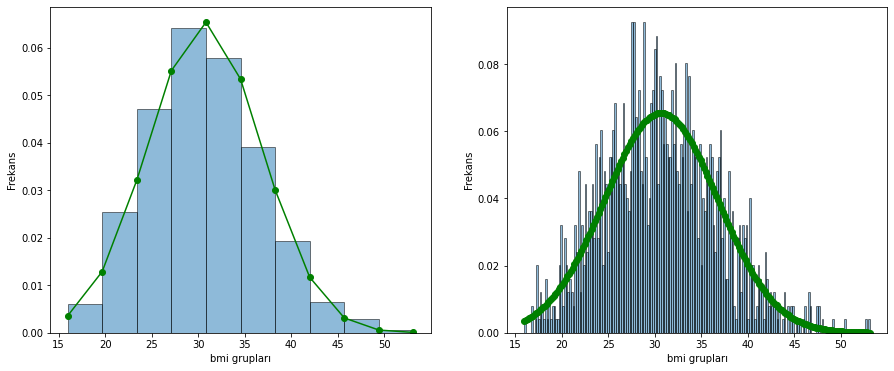

In [10]:
# Bmi(Vücut Kitle İndeksi)’nin dağılımını
plt.figure(figsize=(15,6))
#Normal Dağılım Histogram
plt.subplot(1, 2, 1) 
_, bins, _ = plt.hist(data.bmi, bins = 10,
                      density = 1, alpha = 0.5,                
                      ec= 'black' )                           
from scipy import stats                                      
mu, sigma = stats.norm.fit(data.bmi)

best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("bmi grupları")
plt.ylabel("Frekans")

plt.subplot(1, 2, 2)
_, bins, _ = plt.hist(data.bmi, bins = 200,    
                      density = 1, alpha = 0.5,
                      ec= 'black' )
from scipy import stats

mu, sigma = stats.norm.fit(data.bmi)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("bmi grupları")
plt.ylabel("Frekans")
plt.show()

**BMI dağılımına bakacak olursak normal dağılım göstermektedir. Fakat 45 - 50 (kg/m²) bmi sonrasında çarpıklık (skewness) görülmektedir.**

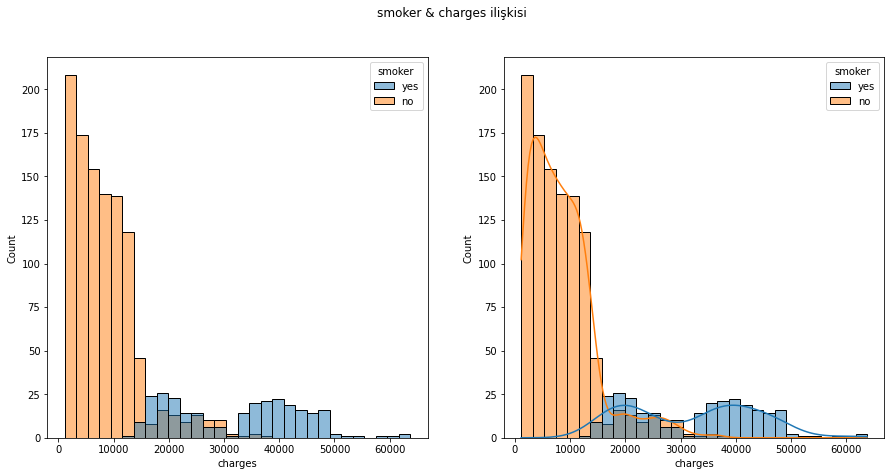

In [11]:
# “smoker” ile “charges” arasındaki ilişki
fig, axes = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle("smoker & charges ilişkisi")
sns.histplot(data=data, x='charges', hue='smoker', ax=axes[0])
sns.histplot(data=data, x='charges', hue='smoker', kde='kde', ax=axes[1])

**Sigorta maliyeti sigara içmeyenler (no) 0 - 15000 arasında yoğun miktarda sigara içmeyen kişi sayısı görülmektedir. Sigara içenlerin (yes) sayısı az olmasına rağmen sigorta maliyeti içmeyenlere göre 15000 - 60000 arasında seyretmektedir.**

In [12]:
# “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişki
rsc = pd.DataFrame({
    'region': [
        np.unique(data.region)[0],
        np.unique(data.region)[1],
        np.unique(data.region)[2],
        np.unique(data.region)[3],
        ] 
, 'no': [
    data[(data['region'] == 'northeast') & (data['smoker'] == 'no')].smoker.value_counts()[0],
    data[(data['region'] == 'northwest') & (data['smoker'] == 'no')].smoker.value_counts()[0],
    data[(data['region'] == 'southeast') & (data['smoker'] == 'no')].smoker.value_counts()[0],
    data[(data['region'] == 'southwest') & (data['smoker'] == 'no')].smoker.value_counts()[0],
], 'yes': [
    data[(data['region'] == 'northeast') & (data['smoker'] == 'yes')].smoker.value_counts()[0],
    data[(data['region'] == 'northwest') & (data['smoker'] == 'yes')].smoker.value_counts()[0],
    data[(data['region'] == 'southeast') & (data['smoker'] == 'yes')].smoker.value_counts()[0],
    data[(data['region'] == 'southwest') & (data['smoker'] == 'yes')].smoker.value_counts()[0],
]})
rsc.melt(id_vars='region')

,region,variable,value
0,northeast,no,257
1,northwest,no,267
2,southeast,no,273
3,southwest,no,267
4,northeast,yes,67
5,northwest,yes,58
6,southeast,yes,91
7,southwest,yes,58


In [13]:
rsc

,region,no,yes
0,northeast,257,67
1,northwest,267,58
2,southeast,273,91
3,southwest,267,58


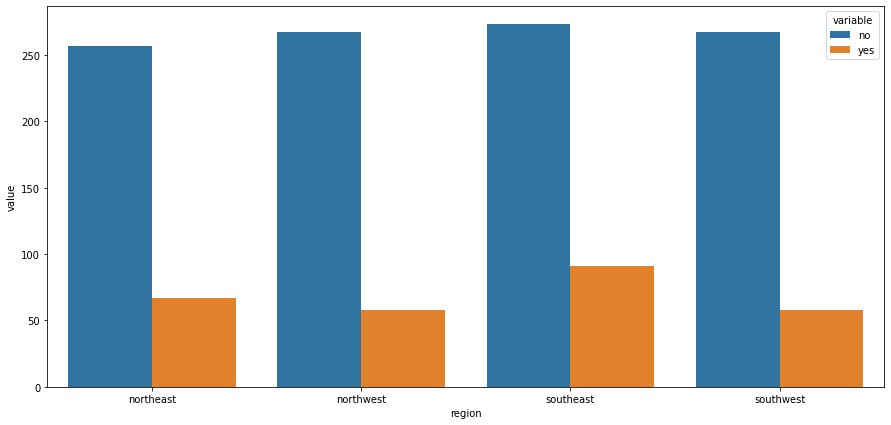

In [14]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'region', y = 'value', data = rsc.melt(id_vars='region'), hue='variable')

**Sigara içenlerle içmeyenler arasındaki  bölgesel dağılım normal görünmektedir. Güneydoğu bölgesinde sigara içenlerin oranı diğer bölgelere göre daha fazla olduğu gözlemlenmiştir.**

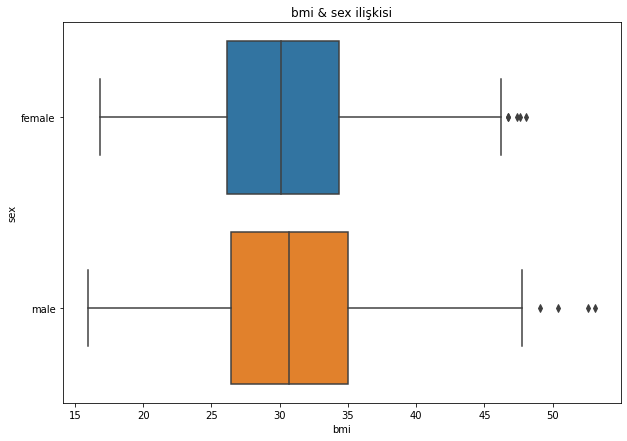

In [15]:
# “bmi” ile “sex”(Cinsiyet) arasındaki ilişki
plt.figure(figsize= (10,7))
plt.title("bmi & sex ilişkisi")
sns.boxplot(x = data['bmi'], y = data['sex'])

**Bmi ve cinsiyet arasındaki ilişkide kadınlar için 26.125 - 34.314 arasında bir bmi değeri gözlenirken erkekler için 26.410 - 34.993 arasında bir bmi değeri gözlemlenmiştir. Cinsiyetin etkilemiş olduğu belirtili bir fark bulunmamaktadır.**

In [16]:
# En çok “children”’a sahip “region”’ı bulunuz
regions = []
children = []
for reg in np.unique(data.region):
  regions.append(reg)
  children.append(data[data.region == reg].children.sum())
most_child = pd.DataFrame({'region': regions, 'children': children}).sort_values(by='children')

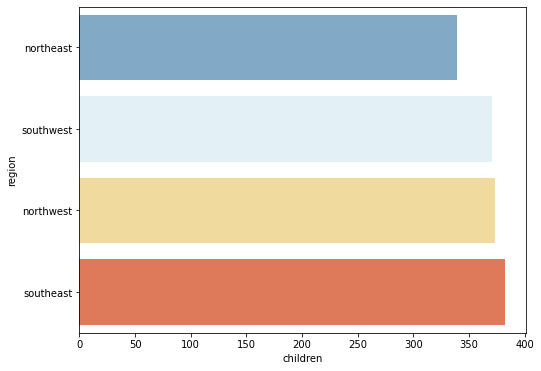

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(y = most_child.region, x = most_child.children, orient='h', palette='RdYlBu_r')
plt.show()

**Bölgesel olarak çoçuk sayısı incelendiğinde, tüm bölgeler birbirine yaklaşık değer vermektedir. Tüm bölgelerin sayısal verileri 10 üzerinde olup en fazla çocuk sayısına sahip olan bölge; 'southeast' ve en az çocuğa sahip bölge; 'northeast' tir.**

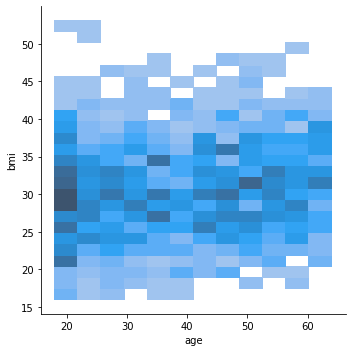

In [18]:
# “Age” ile “bmi” arasındaki ilişki
sns.displot(data=data, x="age", y="bmi")

In [19]:
age_bmi_df = {'age': [], 'bmi': []}
for age in np.unique(data.age):
    age_bmi_df['age'].append(age)
    age_bmi_df['bmi'].append(np.mean(data[data['age'] == age].bmi))
age_bmi_df = pd.DataFrame(age_bmi_df)
age_bmi_df.head()

,age,bmi
0,18,31.326159
1,19,28.596912
2,20,30.632759
3,21,28.185714
4,22,31.087679


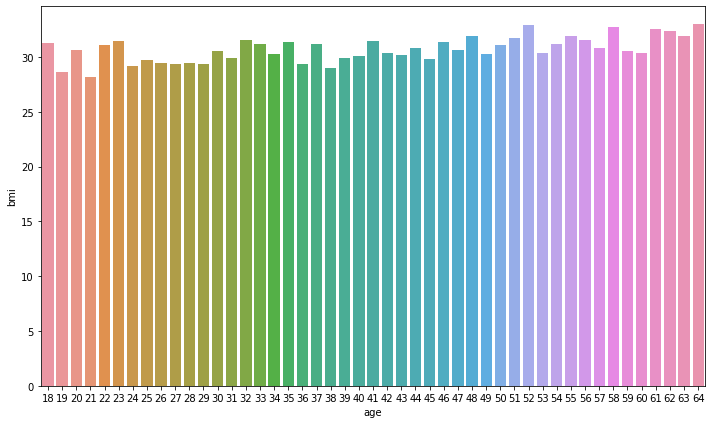

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x = age_bmi_df.age, y = age_bmi_df.bmi)
plt.tight_layout()

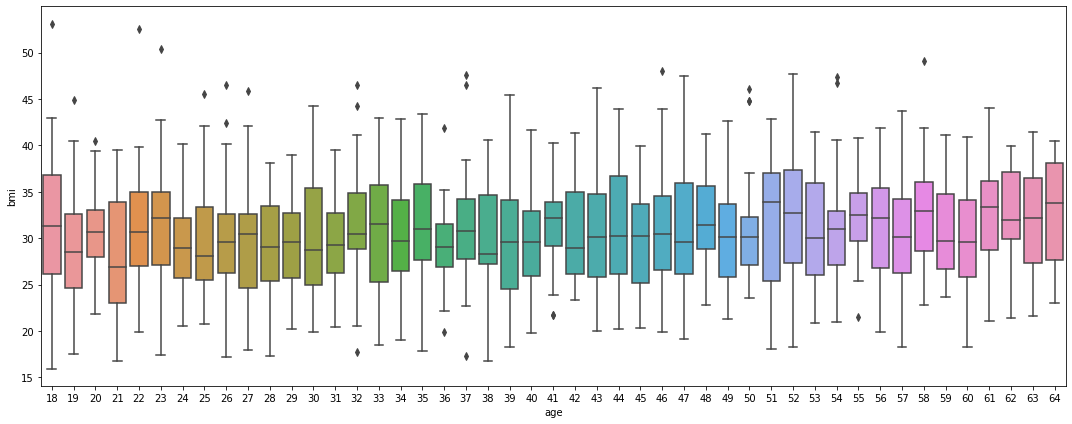

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(x = data.age, y = data.bmi)
plt.tight_layout()

**Bmi ve yaş arasındaki ilişki incelendiğinde 20’li yaşlarda bir yoğunlaşma görülmektedir. Diğer bir göze batan etki ise 30 yaşından sonra bmi değerlerinde gözüken dengesizleşmelerdir. Örneğin, 32 yaşta bmi ortalaması daha düşük, 36 yaşta bmi aralığı kısalmış, 38 yaşta bmi değeri alt sınıra ulaşırken 41 yaşta değerler üst sınırlarda dolaşmaktadır. Buradan çıkarılan sonuç 30’lu yaşlardan sonra bmi değerleri dengesizleşme özelliği göstermektedir.**

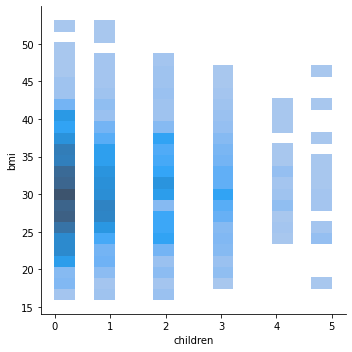

In [22]:
# “bmi” ile “children” arasındaki ilişki
sns.displot(data=data, x="children", y="bmi")

**BMI ve sahip olunan çocuk sayısı arasındaki ilişkiye bakıldığında çocuk sayısı arttıkça BMI değerinin dağılımının saptığı görülmektedir. Hiç çocuğu olmayan bireylerin BMI değeri daha düzenliyken 5 çocuğa sahip olan bireylerin BMI değerlerinin dengesiz olduğu tabloda açıkça görülmektedir.**

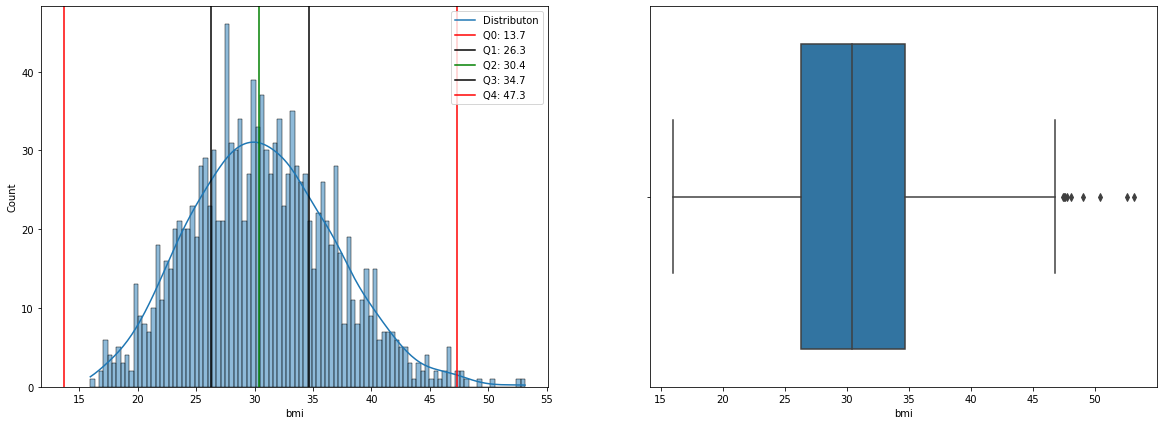

In [23]:
# “bmi” değişkeninde outlier var mıdır?
Q3 = np.quantile(data.bmi, 0.75)
Q1 = np.quantile(data.bmi, 0.25)
Q4 = Q3 + (1.5 * (Q3 - Q1))
Q0 = Q1 - (1.5 * (Q3 - Q1))

plt.figure(figsize=(20,7))
plt.subplot(121)
sns.histplot(data.bmi, kde=True, bins=100)
plt.axvline(Q0, c='red')
plt.axvline(Q1, c='black')
plt.axvline(data.bmi.median(), c='green')
plt.axvline(Q3, c='black')
plt.axvline(Q4, c='red')
plt.legend(['Distributon', f'Q0: {Q0:.1f}', f'Q1: {Q1:.1f}', f'Q2: {data.bmi.median():.1f}', f'Q3: {Q3:.1f}', f'Q4: {Q4:.1f}'], loc='best')
plt.subplot(122)
sns.boxplot(data.bmi)
# sns.kdeplot(data.bmi)

**BMI dağılımında görüldüğü gibi Q2 noktası (30.4 kg/m²) median'ı  belirtmektedir. Q4 noktasından sonra bir aşırılık (outlier) değerleri görülmektedir. Bu gösterimler hisplot üzerinde detayli bir şekilde boxplot karşılaştıması ile görsellenmiştir.**

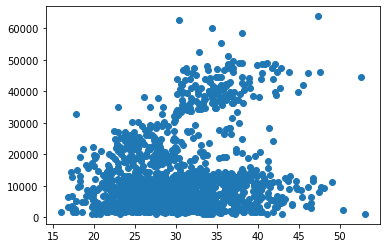

In [24]:
# “bmi” ile “charges” arasındaki ilişki
plt.scatter(data.bmi, data.charges)

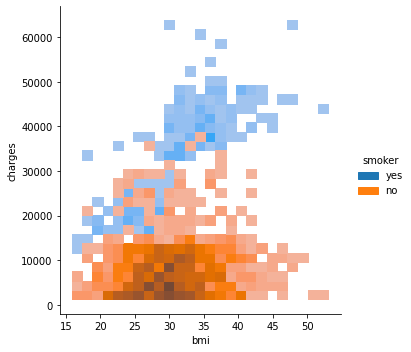

In [25]:
sns.displot(x=data.bmi, y=data.charges, hue=data.smoker)

**Bmi oranı artıkça maliyet oranı artmaktadır. Burada dikkat edilmesi gereken bmi oranı ortalama değere sahip sigara içenlerin oranın fazla olmasından kaynaklı bir maliyet artımı söz konusudur.**

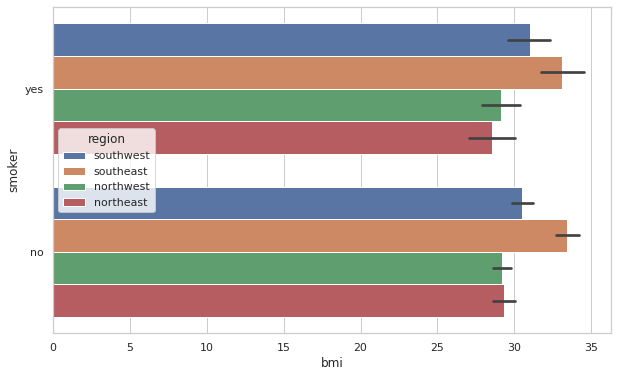

In [26]:
# “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize = (10,6))
ax = sns.barplot(x=data.bmi, y=data.smoker, hue=data.region,
                    data=data)

****

In [27]:
# Veri Ön İşleme 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
enc = OneHotEncoder()
label_enc = LabelEncoder()
region_enc = enc.fit_transform(data['region'].values.reshape(-1,1)).toarray()
data.sex = label_enc.fit_transform(data['sex'].values.reshape(-1,1))
data.smoker = label_enc.fit_transform(data['smoker'].values.reshape(-1,1))
data = pd.concat([data.iloc[:, :5],  pd.DataFrame(data= region_enc, columns=enc.get_feature_names_out(['region'])), data[['charges']]], axis=1)

In [28]:
data.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['charges'], axis=1), data.charges.values, test_size= 0.2,)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


In [31]:
# Normalization train and test set 
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
stand_scaler.fit(x_train)
x_train = stand_scaler.transform(x_train)
x_test = stand_scaler.transform(x_test)

In [32]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [33]:
from sklearn.model_selection import cross_val_score 
linear_score = cross_val_score(linear, x_test, y_test, cv=3).mean()
linear_mae = np.absolute(cross_val_score(linear, x_test, y_test, cv=3, scoring='neg_mean_absolute_error')).mean()
linear_mse = np.absolute(cross_val_score(linear, x_test, y_test, cv=3, scoring='neg_mean_squared_error')).mean()

print(linear_score)
print(linear_mae)
print(linear_mse)

0.7068223925016612
4406.205894876275
40406977.38511759


Max Score Neighbors 7 and Max Score 0.7819243610342465


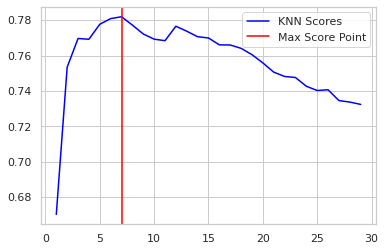

In [34]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(1, 30):
    knn_test = KNeighborsRegressor(n_neighbors=i)
    knn_test.fit(x_train, y_train)
    scores.append(knn_test.score(x_test, y_test))

print(f'Max Score Neighbors {scores.index(np.max(scores))+1} and Max Score {np.max(scores)}')
plt.plot(np.arange(1,30), scores, c='blue', label='KNN Scores')
plt.axvline(scores.index(np.max(scores))+1, c='red', label='Max Score Point')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [36]:
knn_score = cross_val_score(knn, x_test, y_test, cv=3).mean()
knn_mae = np.absolute(cross_val_score(knn, x_test, y_test, cv=3, scoring='neg_mean_absolute_error')).mean()
knn_mse = np.absolute(cross_val_score(knn, x_test, y_test, cv=3, scoring='neg_mean_squared_error')).mean()

print(knn_score)
print(knn_mae)
print(knn_mse)

0.5786811138665778
5005.743060885756
59195004.229517855


In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [38]:
tree_score = cross_val_score(tree, x_test, y_test, cv=3).mean()
tree_mae = np.absolute(cross_val_score(tree, x_test, y_test, cv=3, scoring='neg_mean_absolute_error')).mean()
tree_mse = np.absolute(cross_val_score(tree, x_test, y_test, cv=3, scoring='neg_mean_squared_error')).mean()

print(tree_score)
print(tree_mae)
print(tree_mse)

0.7619021229776518
2617.7372416687886
28868219.845435787


In [39]:
# Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
ensemble = RandomForestRegressor()
ensemble.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
ensemble_score = cross_val_score(ensemble, x_test, y_test, cv=3).mean()
ensemble_mae = np.absolute(cross_val_score(ensemble, x_test, y_test, cv=3, scoring='neg_mean_absolute_error')).mean()
ensemble_mse = np.absolute(cross_val_score(ensemble, x_test, y_test, cv=3, scoring='neg_mean_squared_error')).mean()

print(ensemble_score)
print(ensemble_mae)
print(ensemble_mse)

0.8355700905309614
2636.008590569463
22072552.3130478


In [41]:
models = [linear, knn, tree, ensemble]
model_names = ['Linear Regression','KNN', 'Decision Tree', 'Random Forest']
df_score = {'model': [], 'acc_score': [], 'mean_squared_error': [], 'mean_absolute_error': []}
for name, model in zip(model_names, models):
    df_score['model'].append(name)
    df_score['acc_score'].append(cross_val_score(model, x_test, y_test, cv=3).mean())
    df_score['mean_squared_error'].append(round(np.absolute(cross_val_score(model, x_test, y_test, cv=3, scoring='neg_mean_squared_error')).mean(), 2))
    df_score['mean_absolute_error'].append(round(np.absolute(cross_val_score(model, x_test, y_test, cv=3, scoring='neg_mean_absolute_error')).mean(), 2))
df_score = pd.DataFrame(df_score).sort_values(by='acc_score')
df_score

,model,acc_score,mean_squared_error,mean_absolute_error
1,KNN,0.578681,59195004.23,5005.74
0,Linear Regression,0.706822,40406977.39,4406.21
2,Decision Tree,0.756797,33463998.71,2670.90
3,Random Forest,0.835253,22015573.39,2668.51


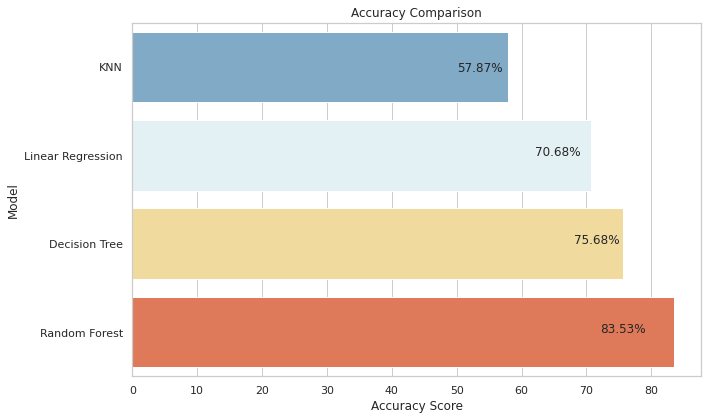

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x = df_score.acc_score*100, y = df_score.model, palette='RdYlBu_r')
plt.text(50.1, 0.05, f"{df_score.acc_score.values[0] * 100:.2f}%")
plt.text(62.1, 1, f"{df_score.acc_score.values[1] * 100:.2f}%")
plt.text(68.1, 2, f"{df_score.acc_score.values[2] * 100:.2f}%")
plt.text(72.1, 3, f"{df_score.acc_score.values[3] * 100:.2f}%")
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Accuracy Comparison')
plt.tight_layout()
plt.show()

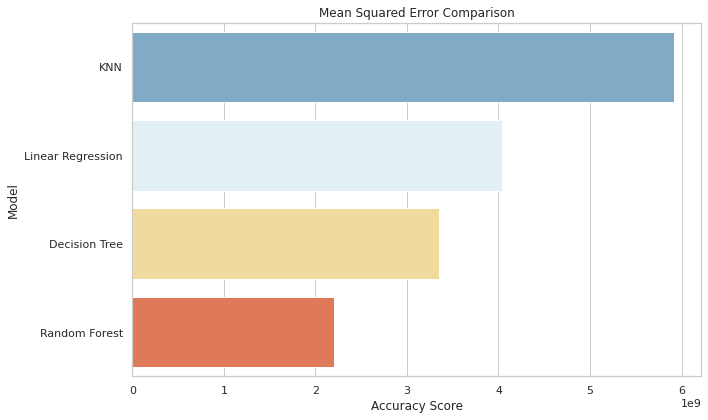

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x = df_score.mean_squared_error*100, y = df_score.model, palette='RdYlBu_r')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Mean Squared Error Comparison')
plt.tight_layout()
plt.show()

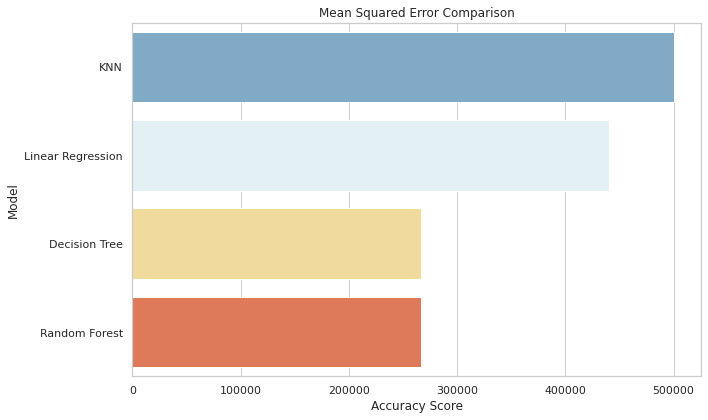

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x = df_score.mean_absolute_error*100, y = df_score.model, palette='RdYlBu_r')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Mean Squared Error Comparison')
plt.tight_layout()
plt.show()

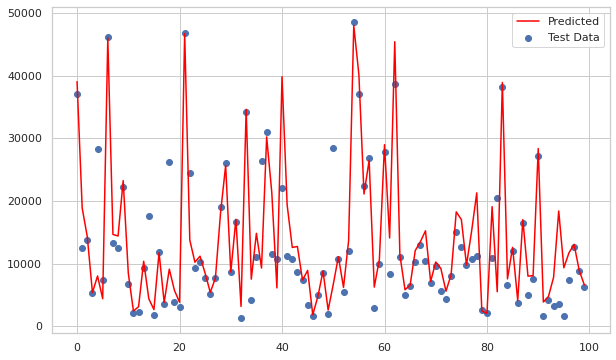

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(len(y_test[:100])), y_test[:100], label='Test Data')
plt.plot(np.arange(len(y_test[:100])), ensemble.predict(x_test[:100]), c='red', label='Predicted')
plt.legend()

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

random = RandomForestRegressor()
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [45]:
grid_search.cv_results_

{'mean_fit_time': array([0.13301716, 0.26779633, 0.39791241, 1.32621856, 0.13565073,
        0.25781784, 0.38788214, 1.27557259, 0.13321772, 0.27287579,
        0.40746956, 1.28086762, 0.12862062, 0.26526914, 0.39585567,
        1.30235229, 0.12867527, 0.25909381, 0.39205685, 1.41162567,
        0.25389729, 0.36737361, 0.38079166, 2.65144701, 0.13223357,
        0.25873351, 0.38570843, 1.29132409, 0.13323307, 0.42826152,
        1.16211305, 2.70567431, 0.12551599, 0.25346284, 0.3789331 ,
        1.28471484, 0.14260855, 0.28122292, 0.41678615, 1.37869534,
        0.13815975, 0.27603421, 0.41213889, 1.34896507, 0.13484082,
        0.27282176, 0.40721254, 1.34513431, 0.13715119, 0.27531939,
        0.41854892, 1.372188  , 0.13612099, 0.2723238 , 0.41215148,
        1.62080307, 0.135461  , 0.26850247, 0.40736017, 1.59569058,
        0.13946242, 0.2736445 , 0.40215244, 1.34219017, 0.13631063,
        0.2712429 , 0.40391774, 1.33480639, 0.13499789, 0.26654983,
        0.40623441, 1.3574151 ,

In [52]:
print(f"Hyperparameter Best Score: {round(grid_search.best_score_ * 100, 2)}%")

Hyperparameter Best Score: 84.31%


In [47]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}